## Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/termdeposit_train.csv')

In [3]:
df_test = pd.read_csv('/content/termdeposit_test.csv')

In [4]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


## Checking for null values

Seems like no null values are present. But it is not guranteed that no null values are present for object dtype as an empty string is also counted a non-null value.

We can use the unique method to identify if any empty string is present or not. We will do that while converting the data to numerical values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [8]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

## Dropping some columns

Dropping off ID column as it is unique in nature and has no significance whatsoever with the subscription status of the customer.

In [9]:
df.drop('ID', axis=1, inplace=True)

In [10]:
df_test.drop('ID', axis=1, inplace=True)

## Converting to categorical data

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


Let us convert some columns to categorical data. We are using Ordinal encoding because we want the model to think that there is a relationship between job type and the subscription status.

Job

In [12]:
df['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [13]:
job_dic = {'admin.': 0, 'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'management':4, 'retired':5, 'self-employed':6, 'services':7, 'student':8, 'technician':9, 'unemployed':10, 'unknown':11}

df['job'] = df['job'].map(job_dic)
df_test['job'] = df_test['job'].map(job_dic)

Marital

In [14]:
df['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [15]:
marital_dic = {'divorced':0, 'married':1, 'single':2}

df['marital'] = df['marital'].map(marital_dic)
df_test['marital'] = df_test['marital'].map(marital_dic)

Education

In [16]:
df['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [17]:
education_dic = {'primary':0, 'secondary':1, 'tertiary':2, 'unknown':3}

df['education'] = df['education'].map(education_dic)
df_test['education'] = df_test['education'].map(education_dic)

Default

In [18]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['default'] = df['default'].map({'no':0, 'yes':1})
df_test['default'] = df_test['default'].map({'no':0, 'yes':1})

Housing

In [20]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [21]:
df['housing'] = df['housing'].map({'no':0, 'yes':1})
df_test['housing'] = df_test['housing'].map({'no':0, 'yes':1})

Loan

In [22]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
df['loan'] = df['loan'].map({'no':0, 'yes':1})
df_test['loan'] = df_test['loan'].map({'no':0, 'yes':1})

Contact

In [24]:
df['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [25]:
df['contact'] = df['contact'].map({'cellular':0, 'telephone':1, 'unknown':2})
df_test['contact'] = df_test['contact'].map({'cellular':0, 'telephone':1, 'unknown':2})

Month

In [26]:
df['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [27]:
month_dic = {'jan':0, 'feb':1, 'mar':2, 'apr':3, 'may':4, 'jun':5, 'jul':6, 'aug':7, 'sep':8, 'oct':9, 'nov':10, 'dec':11}

df['month'] = df['month'].map(month_dic)
df_test['month'] = df_test['month'].map(month_dic)

Poutcome

In [28]:
df['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [29]:
df['poutcome'] = df['poutcome'].map({'unknown':1, 'failure':0, 'other':2, 'success':3})
df_test['poutcome'] = df_test['poutcome'].map({'unknown':1, 'failure':0, 'other':2, 'success':3})

Subscribed

In [30]:
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
df['subscribed'] = df['subscribed'].map({'no':0, 'yes':1})

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,10,44,2,-1,0,1,0
1,31,11,1,1,0,3,0,0,0,20,6,91,2,-1,0,1,0
2,27,7,1,1,0,891,1,0,0,18,6,240,1,-1,0,1,0
3,57,4,0,2,0,3287,0,0,0,22,5,867,1,84,3,3,1
4,31,9,1,1,0,119,1,0,0,4,1,380,1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,4,116,2,-1,0,1,0
31643,53,4,0,2,0,380,0,1,0,5,5,438,2,-1,0,1,1
31644,32,4,2,2,0,312,0,0,0,7,7,37,3,-1,0,1,0
31645,57,9,1,1,0,225,1,0,1,15,4,22,7,337,12,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         31647 non-null  int64
 1   job         31647 non-null  int64
 2   marital     31647 non-null  int64
 3   education   31647 non-null  int64
 4   default     31647 non-null  int64
 5   balance     31647 non-null  int64
 6   housing     31647 non-null  int64
 7   loan        31647 non-null  int64
 8   contact     31647 non-null  int64
 9   day         31647 non-null  int64
 10  month       31647 non-null  int64
 11  duration    31647 non-null  int64
 12  campaign    31647 non-null  int64
 13  pdays       31647 non-null  int64
 14  previous    31647 non-null  int64
 15  poutcome    31647 non-null  int64
 16  subscribed  31647 non-null  int64
dtypes: int64(17)
memory usage: 4.1 MB


In [34]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Now it is we can conclude that there are no empty columns present in the dataset.

## Visualizations and Descriptions

Based on the descriptions we might me tempeted to comment on the skewness of the data but since most of the columns are discrete in nature, skewness might not be as informative as we might expect it to be.

In [35]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.146839,258.113534,2.765697,39.576042,0.574272,1.001959,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,2.406218,257.118973,3.113830,99.317592,2.422529,0.530968,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,4.000000,104.000000,1.000000,-1.000000,0.000000,1.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,5.000000,180.000000,2.000000,-1.000000,0.000000,1.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,7.000000,318.500000,3.000000,-1.000000,0.000000,1.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


Univariate Analysis

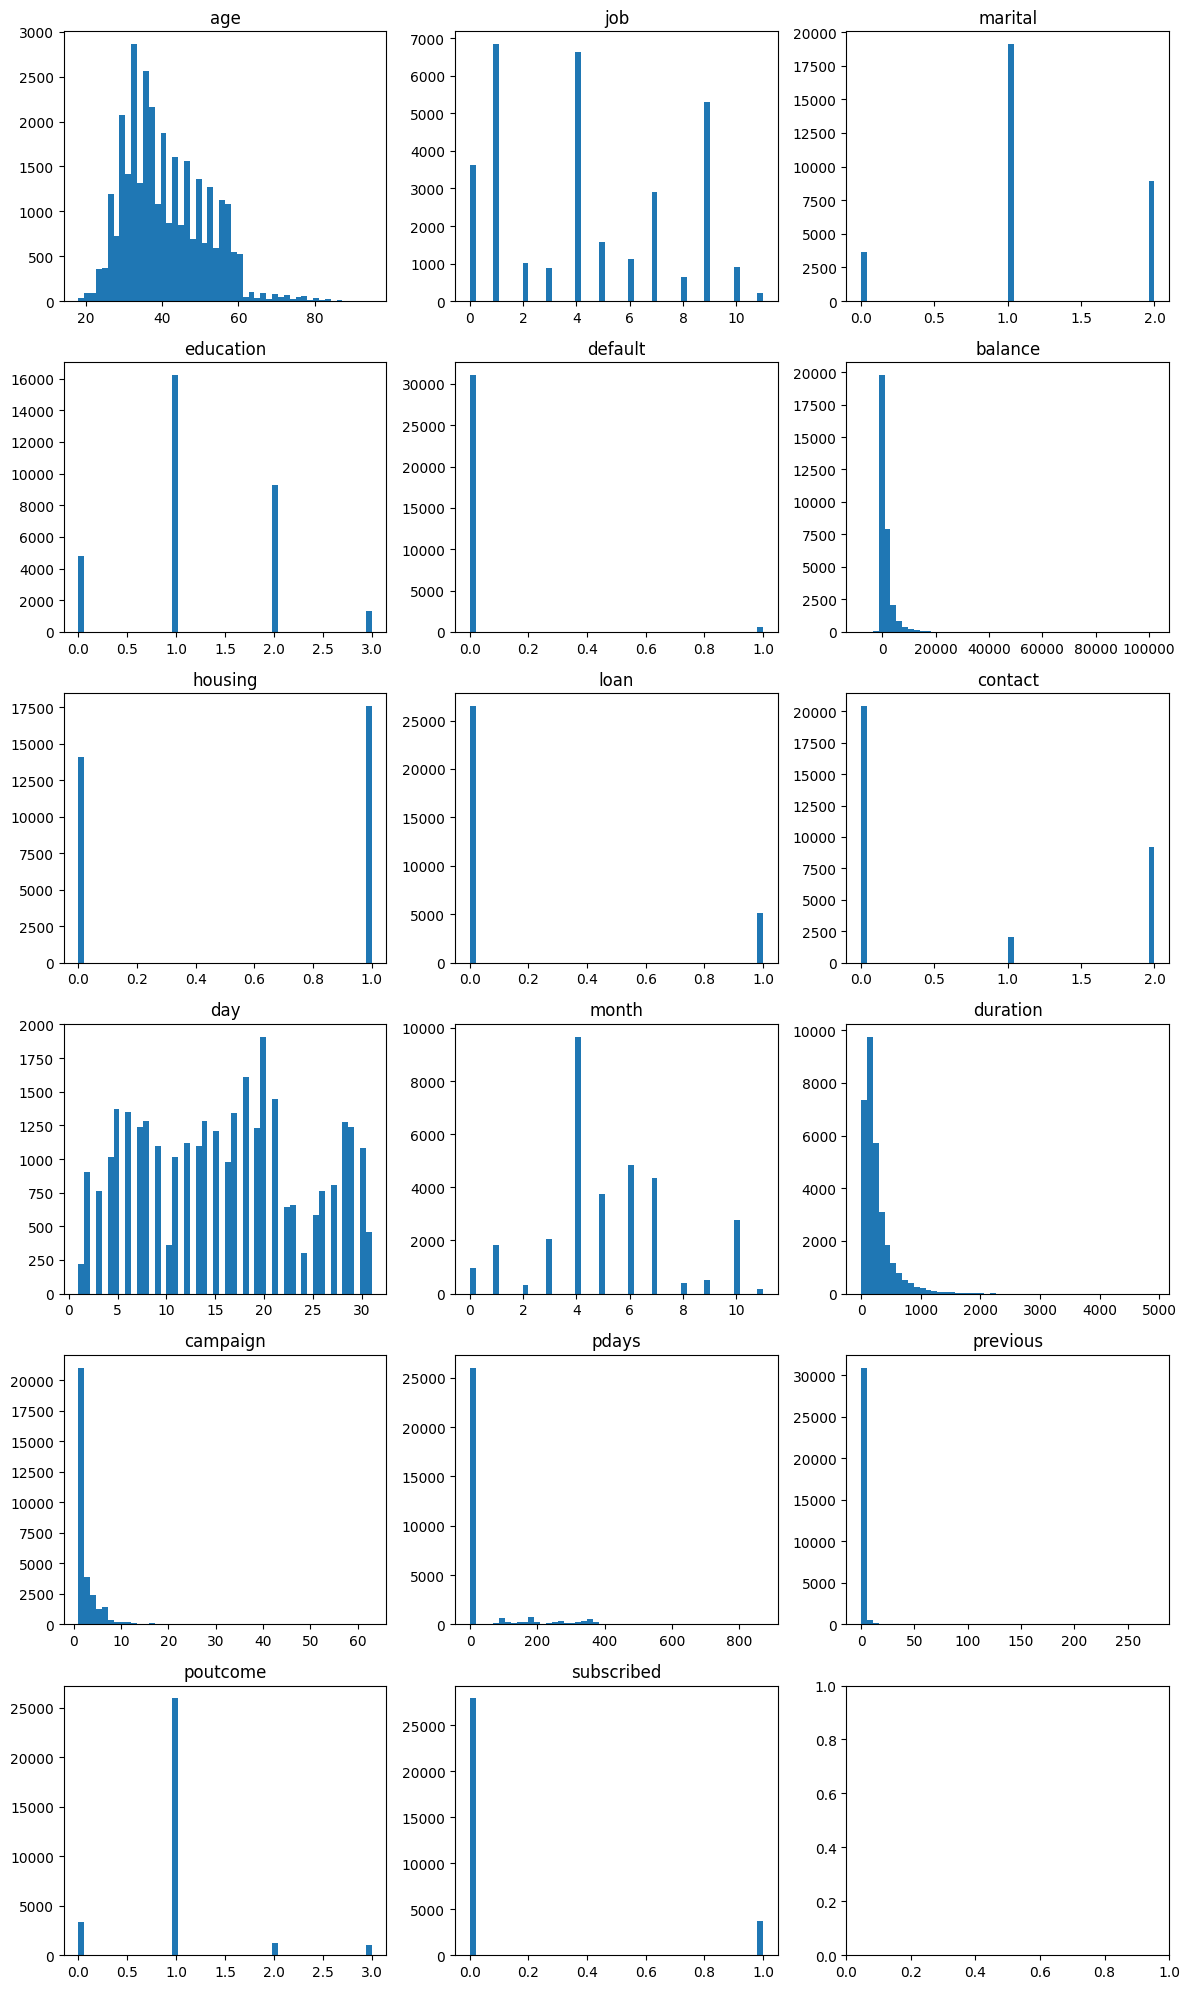

In [36]:
num_histograms = 18
num_cols = 3
num_rows = 6
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(df.columns[:num_histograms]):
    axes[i].hist(df[col], bins=50)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Boxplot for outlier detection

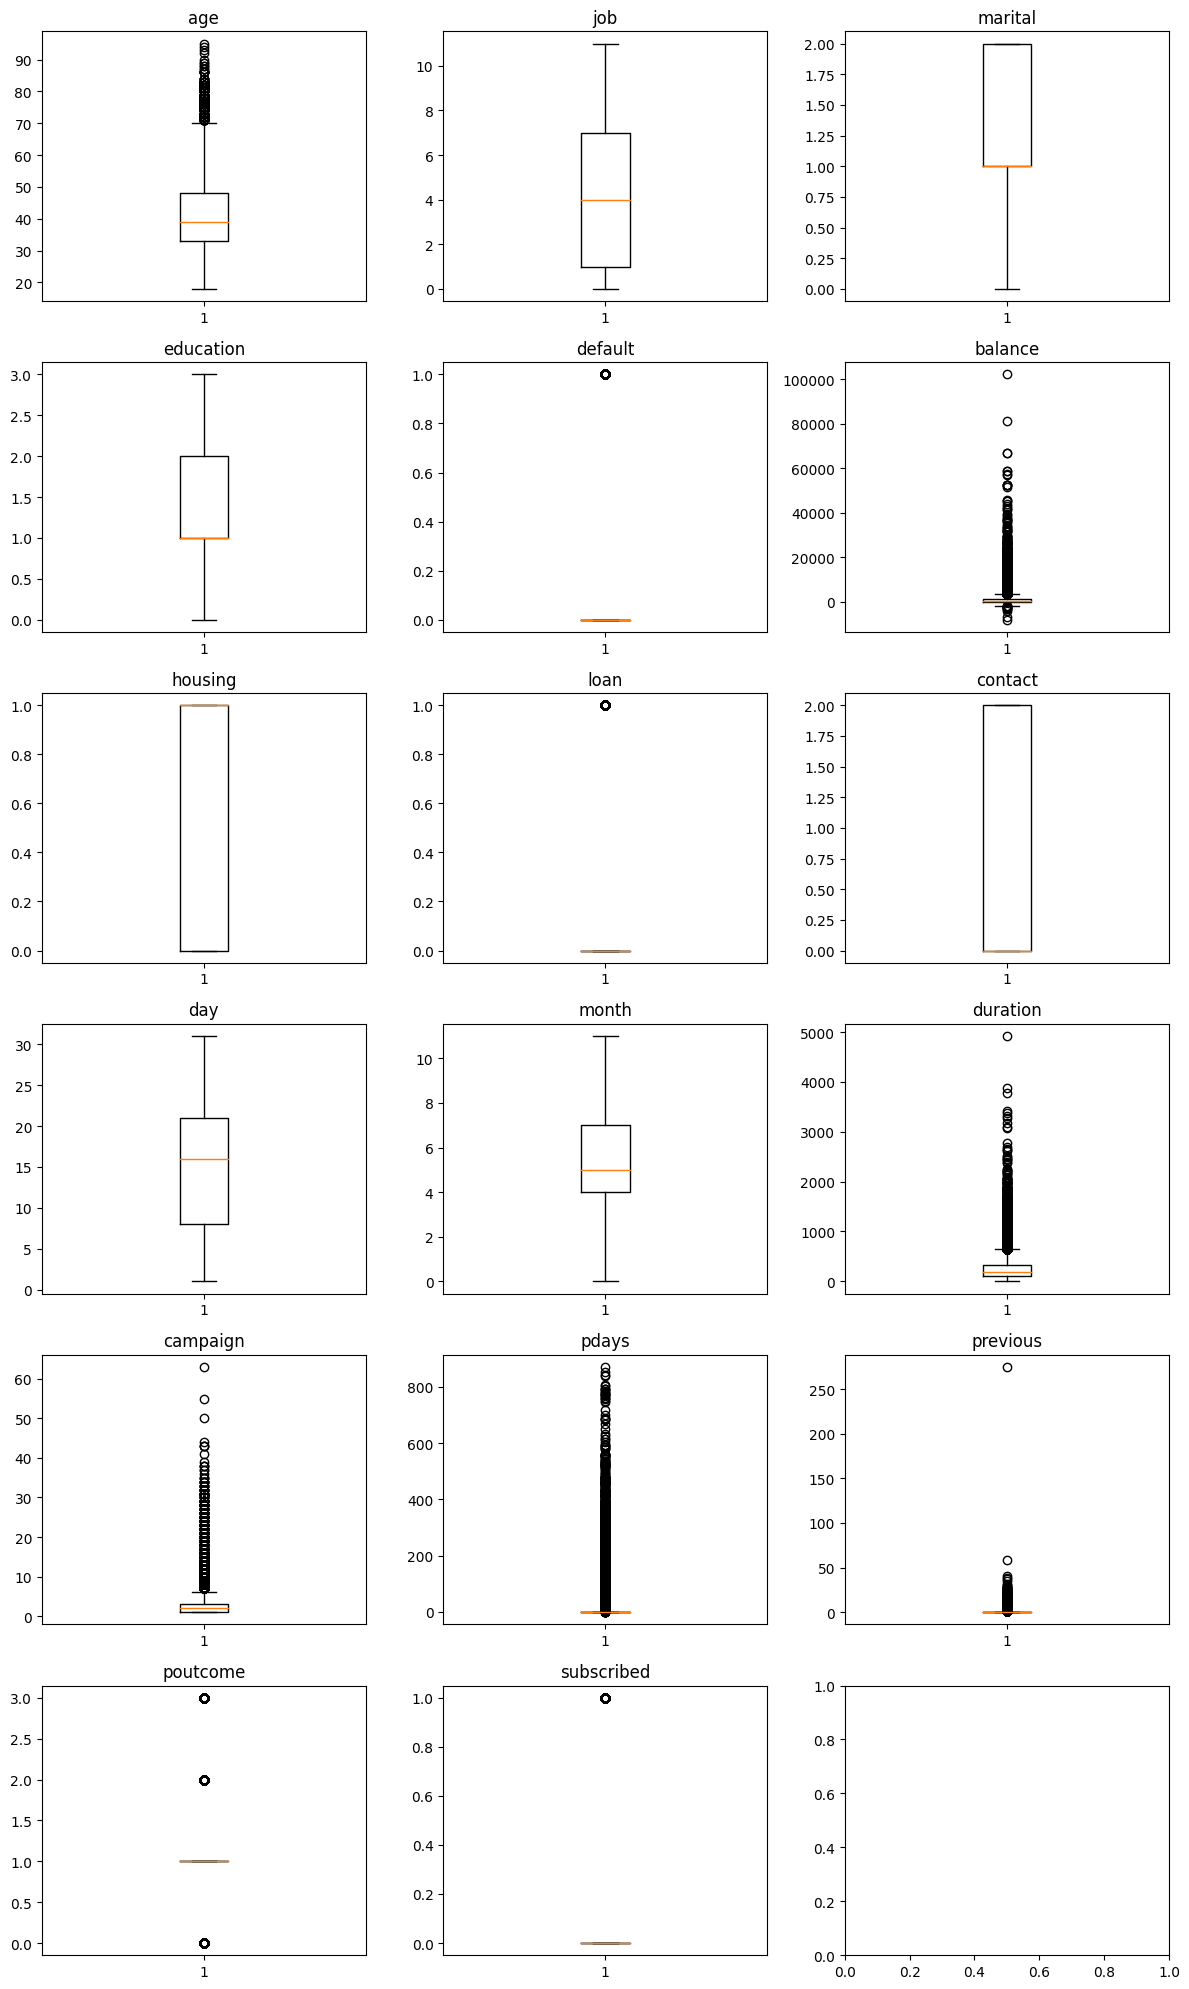

In [37]:
num_histograms = 18
num_cols = 3
num_rows = 6
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(df.columns[:num_histograms]):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Bi-variate Analysis

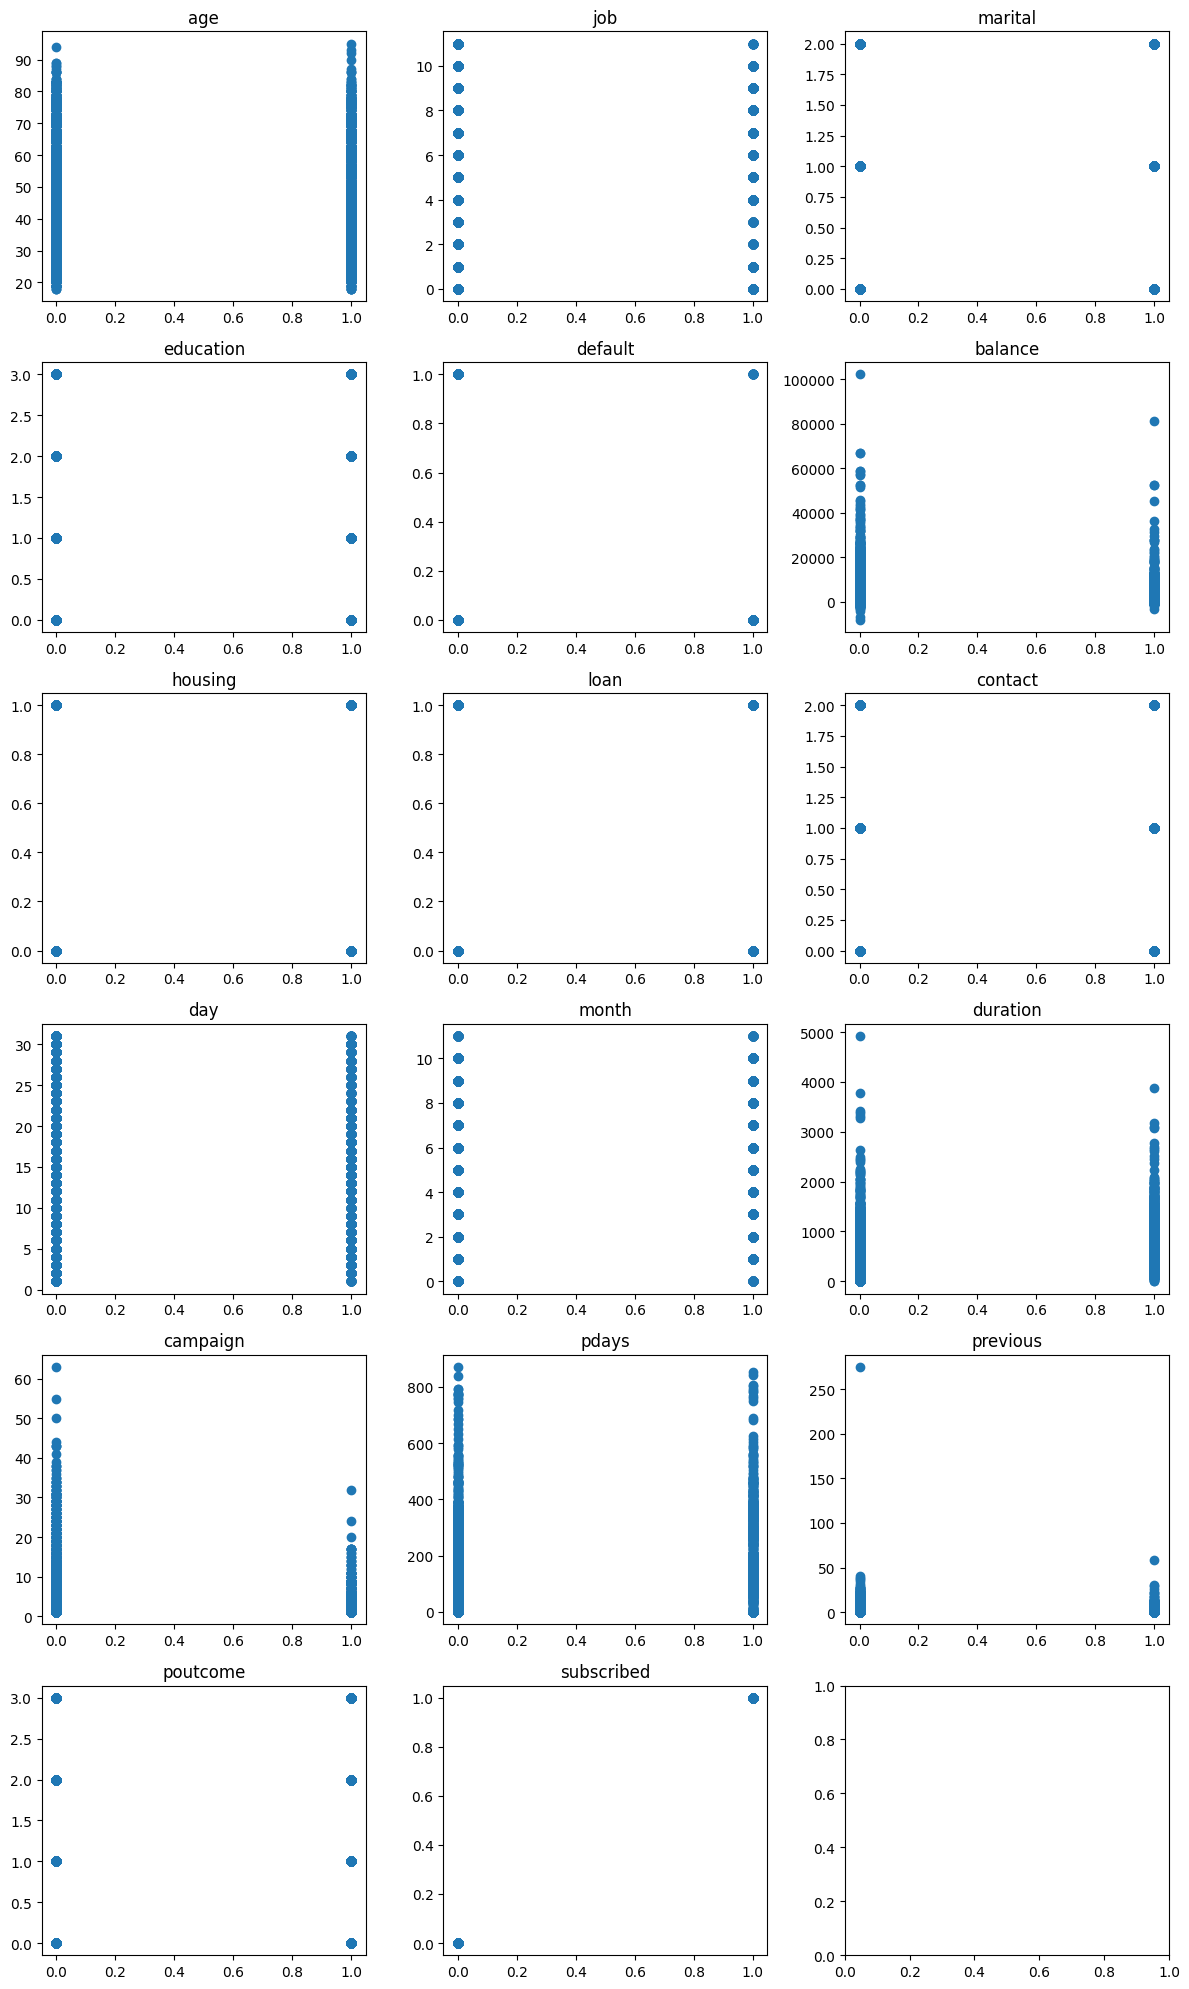

In [38]:
num_histograms = 18
num_cols = 3
num_rows = 6
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 20))

axes = axes.flatten()
for i, col in enumerate(df.columns[:num_histograms]):
    axes[i].scatter(df['subscribed'], df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Mulitvariate Analysis

## Correlations

Looking at the correlations one thing we can comment for sure is that duration of a phone call has a very high correlation with the subscription status and that is something we would expect wouldn't we ?

While we won't exclude other parameters because there could be a non-linear relationship between the independent variables and the dependent variable.

PCA could be a could choice to decide the right columns for our model.

In [39]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,0.098714,-0.003870,0.005733,-0.021947,0.005761,0.017222,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,0.045158,0.002694,0.001469,-0.022552,-0.003032,0.019906,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.052429,0.011544,-0.009394,0.019741,0.012717,0.018685,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,0.052856,0.003842,0.006142,-0.001566,0.015280,0.032096,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.014244,-0.010849,0.018538,-0.029622,-0.015877,-0.004925,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.095850,0.024274,-0.012032,0.001789,0.013843,0.016251,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,-0.173980,0.003021,-0.021076,0.118790,0.034231,-0.109043,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.022717,-0.012781,0.009340,-0.020078,-0.009258,-0.042151,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,-0.175751,-0.016503,0.022666,-0.245076,-0.141098,0.002847,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,0.099356,-0.032288,0.159168,-0.087626,-0.048752,0.007747,-0.029600


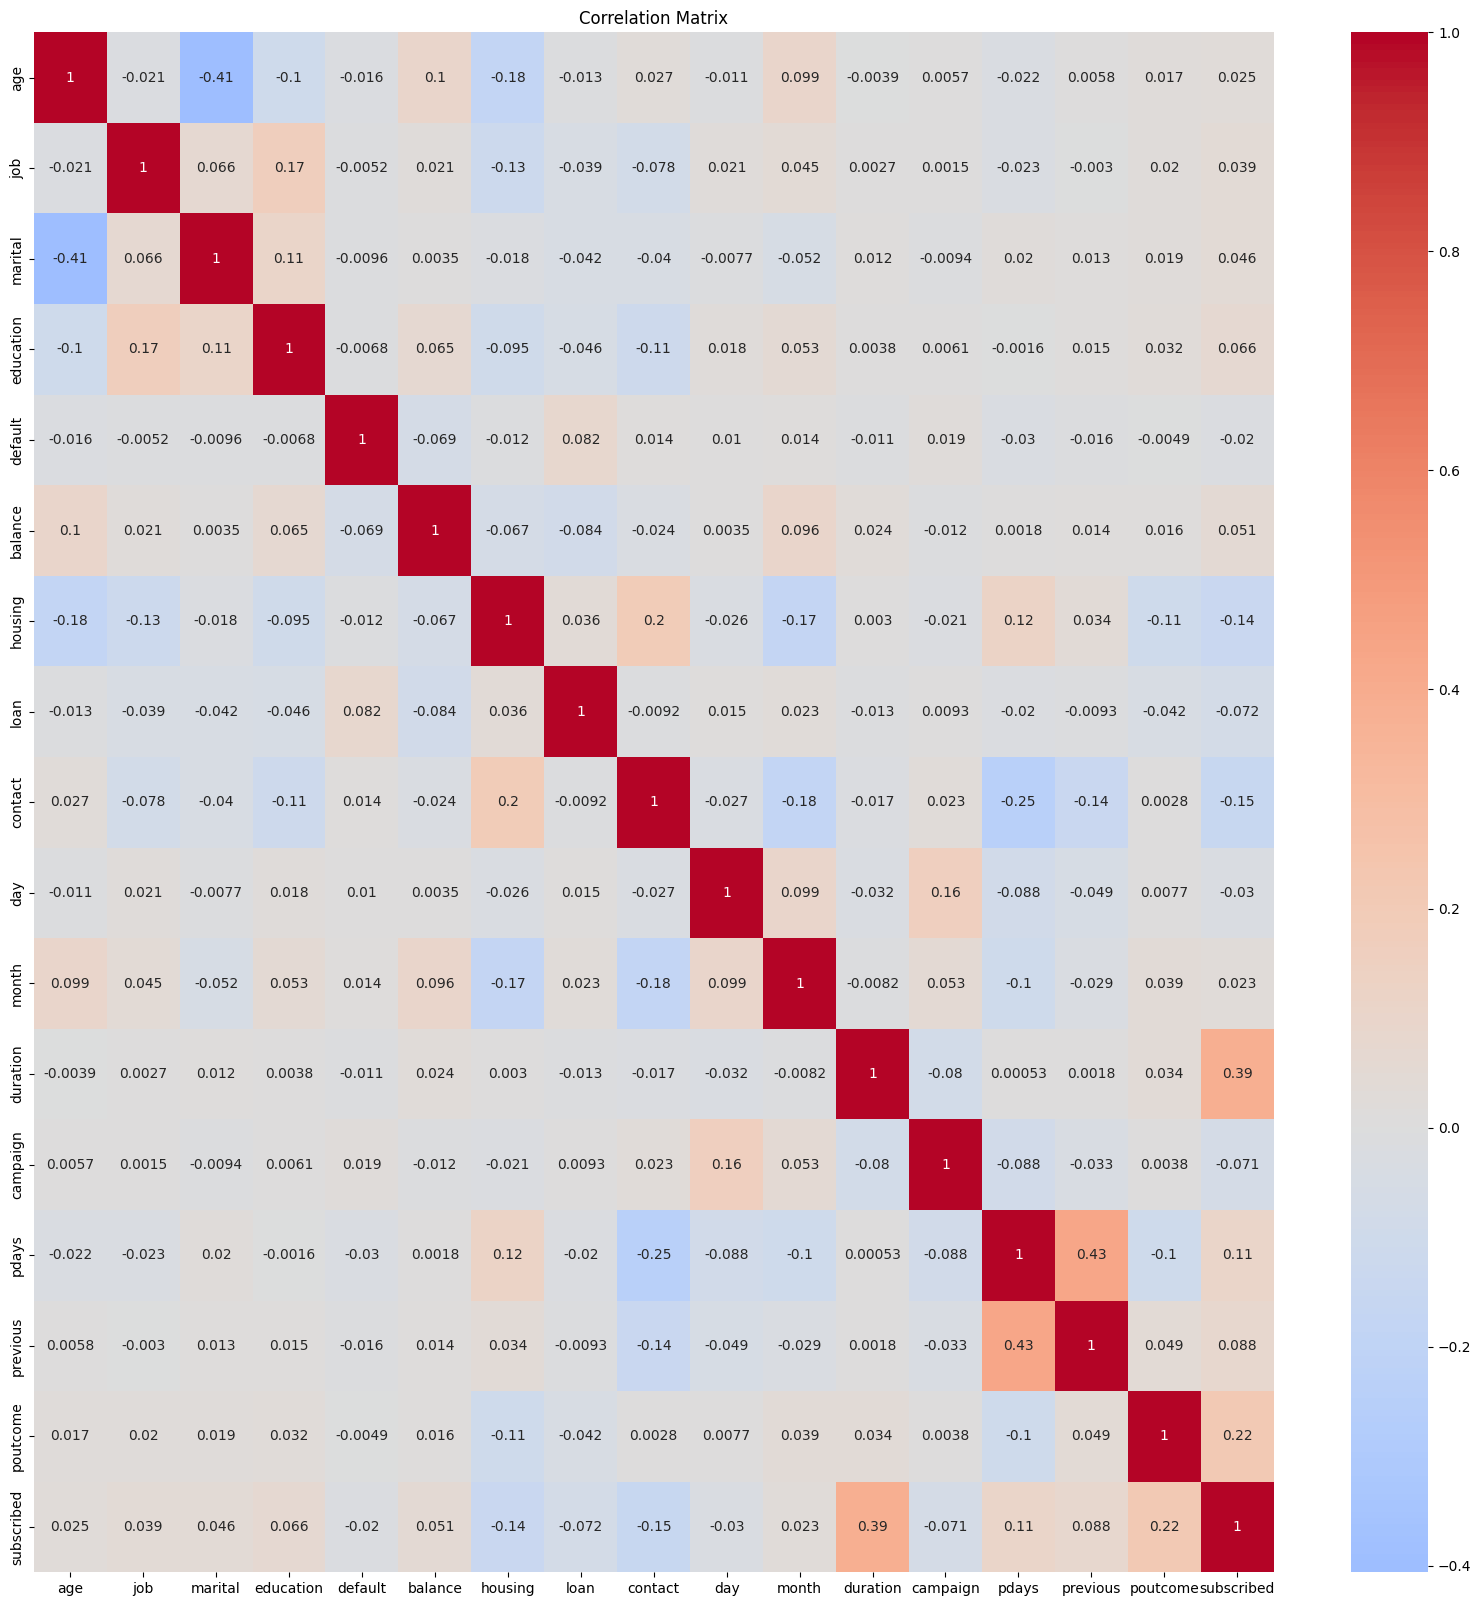

In [40]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Skewness

Discrete Numerical Columns for Skewness Analysis:

age: Age of the client

duration: Contact duration

campaign: Number of contacts performed during this campaign to the client

pdays: Number of days that passed by after the client was last contacted

previous: Number of contacts performed before this campaign

balance: bank balance in dollars

campaign: number of contacts performed during this campaign to the client

In [41]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month          0.249339
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome       1.354792
subscribed     2.377445
dtype: float64

Duration

In [42]:
df['duration'] = np.power(df['duration'], 1/3)
df_test['duration'] = np.power(df_test['duration'], 1/3)

Campaign

In [43]:
df['campaign'] = np.power(df['campaign'], 1/3)
df_test['campaign'] = np.power(df_test['campaign'], 1/3)

Pdays - For this column we won't be applying any transformation, because some values are getting so small that they are apprently converted to Nan values.

previous

In [44]:
df['previous'] = np.power(df['previous'], 1/5)
df_test['previous'] = np.power(df_test['previous'], 1/5)

Balance - For this column we won't be applying any transformation, because some values are getting so small that they are apprently converted to Nan values.

campaign

In [45]:
df['campaign'] = np.power(df['campaign'], 1/4)
df_test['campaign'] = np.power(df_test['campaign'], 1/4)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         31647 non-null  int64  
 1   job         31647 non-null  int64  
 2   marital     31647 non-null  int64  
 3   education   31647 non-null  int64  
 4   default     31647 non-null  int64  
 5   balance     31647 non-null  int64  
 6   housing     31647 non-null  int64  
 7   loan        31647 non-null  int64  
 8   contact     31647 non-null  int64  
 9   day         31647 non-null  int64  
 10  month       31647 non-null  int64  
 11  duration    31647 non-null  float64
 12  campaign    31647 non-null  float64
 13  pdays       31647 non-null  int64  
 14  previous    31647 non-null  float64
 15  poutcome    31647 non-null  int64  
 16  subscribed  31647 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 4.1 MB


In [47]:
df.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month         0.249339
duration      0.647275
campaign      1.048397
pdays         2.642374
previous      1.787927
poutcome      1.354792
subscribed    2.377445
dtype: float64

We have reduced the skewness by a considerable amount and now we can move on to the further analysis.

## Splitting the data into train set and validation set

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop('subscribed', axis=1), df['subscribed'], test_size = 0.2, random_state=42)

In [49]:
X_train.shape

(25317, 16)

In [50]:
X_val.shape

(6330, 16)

In [51]:
y_train.shape

(25317,)

In [52]:
y_val.shape

(6330,)

## Scaling the data

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## PCA

As from the plot even if we get rid of the last component we still retain over 99% of the information, so it is ok to get rid of that.

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 13)
train_pca = pca.fit_transform(X_train)
val_pca = pca.transform(X_val)

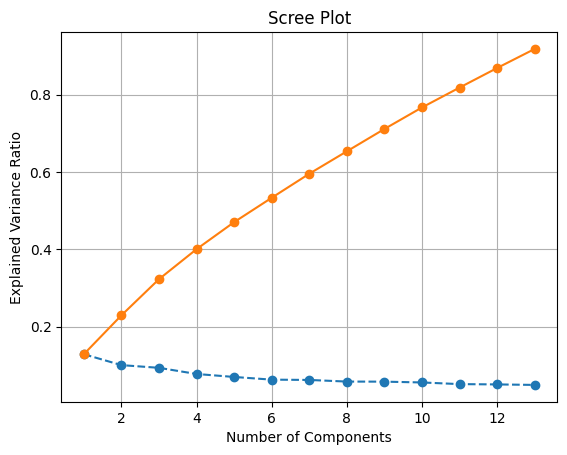

In [117]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [118]:
sum(pca.explained_variance_ratio_)

0.9178437074287877

## Models

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [120]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_pca, y_train)
sgd_clf.score(val_pca, y_val)

0.8939968404423381

In [121]:
lr = LogisticRegression(random_state=42)
lr.fit(train_pca, y_train)
lr.score(val_pca, y_val)

0.8974723538704581

In [122]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_pca, y_train)
dt.score(val_pca, y_val)

0.8593996840442338

In [123]:
rt = RandomForestClassifier(random_state=42)
rt.fit(train_pca, y_train)
rt.score(val_pca, y_val)

0.9001579778830964

In [124]:
svc_clf = SVC(random_state=42)
svc_clf.fit(train_pca, y_train)
svc_clf.score(val_pca, y_val)

0.9018957345971564

In [125]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(train_pca, y_train)
knn_clf.score(val_pca, y_val)

0.8932069510268562

## Models without PCA

In [70]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.score(X_val, y_val)

0.8958925750394945

In [71]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

0.8979462875197473

In [72]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt.score(X_val, y_val)

0.8714060031595576

In [73]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train, y_train)
rt.score(X_val, y_val)

0.906003159557662

In [74]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)
svc_clf.score(X_val, y_val)

0.9018957345971564

In [75]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_val, y_val)

0.8973143759873617

## Conclusion

Even with significant data loss of around 9% using pca, our model still performs more or less the same as without pca. Seems like pca is able to capture the right features in a higher dimensional space.

Now we combine our Train Set with Val Set and train the models to generate results for the Test set.

## Scaling the data for Test set

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(df.drop('subscribed', axis=1))
y_train = df['subscribed']
X_test = scaler.transform(df_test)

## PCA for Test set

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 13)
train_pca = pca.fit_transform(X_train)
val_pca = pca.transform(X_val)

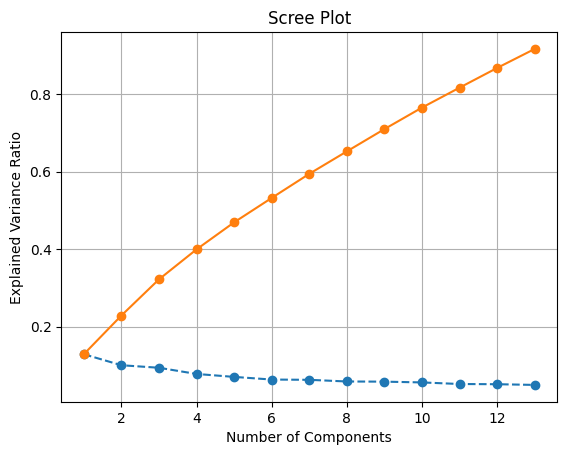

In [128]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [129]:
sum(pca.explained_variance_ratio_)

0.9174181991310394

## Random Forest Model for Test Set

In [130]:
rt = RandomForestClassifier(random_state=42)
rt.fit(X_train, y_train)
prediction = rt.predict(X_test)

In [133]:
df = pd.DataFrame(prediction, columns=['subscribed'])

df.to_csv('Subscribed_output.csv', index=True)